In [1]:
from PIL import Image
import imageio
import skimage.io
from skimage.io import imread, imshow, show
import scipy.misc
import skimage.util
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy.ndimage import zoom
#from scipy.stats import signaltonoise
from skimage import data, img_as_float, color, filters
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, swirl, warp
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

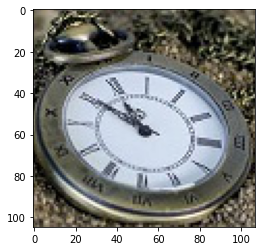

(<matplotlib.image.AxesImage at 0x7fa8795c75b0>, None)

In [2]:
im = Image.open("./images/clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()

##Three dimensional Array

In [3]:
a = np.arange(1,7).reshape(2,3)
print(a)
b = a * 10
print(b)
c = a * 100
print(c)

[[1 2 3]
 [4 5 6]]
[[10 20 30]
 [40 50 60]]
[[100 200 300]
 [400 500 600]]


In [4]:
m = skimage.util.montage([a,b,c])
print(m)

[[  1   2   3  10  20  30]
 [  4   5   6  40  50  60]
 [100 200 300 129 129 129]
 [400 500 600 129 129 129]]


In [5]:
abc = np.array([a,b,c])
print(abc)
print(abc.shape)
print(skimage.util.montage(abc))

[[[  1   2   3]
  [  4   5   6]]

 [[ 10  20  30]
  [ 40  50  60]]

 [[100 200 300]
  [400 500 600]]]
(3, 2, 3)
[[  1   2   3  10  20  30]
 [  4   5   6  40  50  60]
 [100 200 300 129 129 129]
 [400 500 600 129 129 129]]


In [6]:
d = a[:,:2]
print(d)

[[1 2]
 [4 5]]


In [7]:
m = skimage.util.montage([a,b,c])
print(m)

[[  1   2   3  10  20  30]
 [  4   5   6  40  50  60]
 [100 200 300 129 129 129]
 [400 500 600 129 129 129]]


In [8]:
print(np.mean(np.array([a,b,c])))

129.5


In [9]:
print(skimage.util.montage([a,b,c], fill=0))

[[  1   2   3  10  20  30]
 [  4   5   6  40  50  60]
 [100 200 300   0   0   0]
 [400 500 600   0   0   0]]


In [10]:
print(skimage.util.montage([a,b,c],grid_shape=(1,3)))
print(skimage.util.montage([a,b,c],grid_shape=(3,1)))

[[  1   2   3  10  20  30 100 200 300]
 [  4   5   6  40  50  60 400 500 600]]
[[  1   2   3]
 [  4   5   6]
 [ 10  20  30]
 [ 40  50  60]
 [100 200 300]
 [400 500 600]]


In [11]:
print(skimage.util.montage([a,b,c],grid_shape=(2,3)))
print(skimage.util.montage([a,b,c],grid_shape=(2,3),fill=0))

[[  1   2   3  10  20  30 100 200 300]
 [  4   5   6  40  50  60 400 500 600]
 [129 129 129 129 129 129 129 129 129]
 [129 129 129 129 129 129 129 129 129]]
[[  1   2   3  10  20  30 100 200 300]
 [  4   5   6  40  50  60 400 500 600]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


In [12]:
print(skimage.util.montage([a,b,c], padding_width=1))

[[129 129 129 129 129 129 129 129 129]
 [129   1   2   3 129  10  20  30 129]
 [129   4   5   6 129  40  50  60 129]
 [129 129 129 129 129 129 129 129 129]
 [129 100 200 300 129 129 129 129 129]
 [129 400 500 600 129 129 129 129 129]
 [129 129 129 129 129 129 129 129 129]]


In [13]:
print(skimage.util.montage([a,b,c], padding_width=1, fill=0))

[[  0   0   0   0   0   0   0   0   0]
 [  0   1   2   3   0  10  20  30   0]
 [  0   4   5   6   0  40  50  60   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0 100 200 300   0   0   0   0   0]
 [  0 400 500 600   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


(105, 107, 3)
(210, 214, 3)


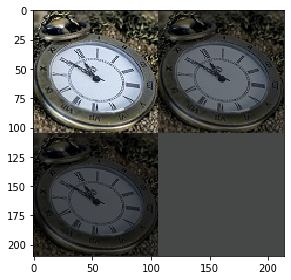

In [14]:
a = skimage.io.imread("./images/clock.jpg")
print(a.shape)

b = a // 2
c = a // 3

#bisa di fill=(R,G,B)
m = skimage.util.montage([a,b,c], multichannel=True)
print(m.shape)

skimage.io.imsave("./images/clock2.jpg", m)
skimage.io.imshow(m)

#No2

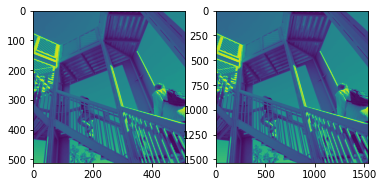

In [15]:
fig = plt.figure()
img1 = fig.add_subplot(121)
img2 = fig.add_subplot(122)
ascent = misc.ascent()
result = ndimage.zoom(ascent,3.0)
img1.imshow(ascent, vmin=0, vmax=255)
img2.imshow(result, vmin=0, vmax=255)
plt.show()

In [16]:
print(ascent.shape)
print(result.shape)

(512, 512)
(1536, 1536)


<function matplotlib.pyplot.show(close=None, block=None)>

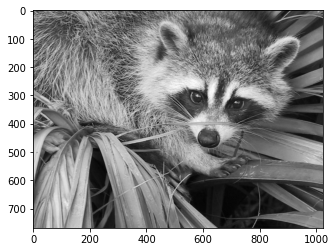

In [17]:
face = scipy.misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)
plt.show

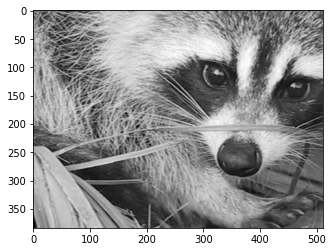

In [18]:
face = scipy.misc.face(gray=True)
lx, ly = face.shape
crop_img = face[lx//4:-lx//4,ly//4:-ly//4]

plt.imshow(crop_img, cmap=plt.cm.gray)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

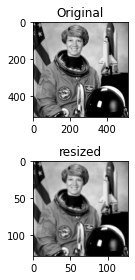

In [19]:
img3 = color.rgb2gray(data.astronaut())

image_resized = resize(img3,(img3.shape[0] // 4, img3.shape[1] // 4), anti_aliasing=True)

fig, ax = plt.subplots(2)


ax[0].imshow(img3,cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("resized")

ax[0].set_xlim(0,512)
ax[0].set_ylim(512,0)
plt.tight_layout()
plt.show

#no3

In [20]:
original_image = skimage.io.imread('./images/zell_am_see_snowboarding.jpg')
original_image - skimage.util.img_as_float(original_image)

array([[[193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        ...,
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059]],

       [[193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        ...,
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059]],

       [[193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        [193.23921569, 208.18039216, 213.16078431],
        ...,
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059],
        [204.19607843, 205.19215686, 209.17647059]],

       ...,

      

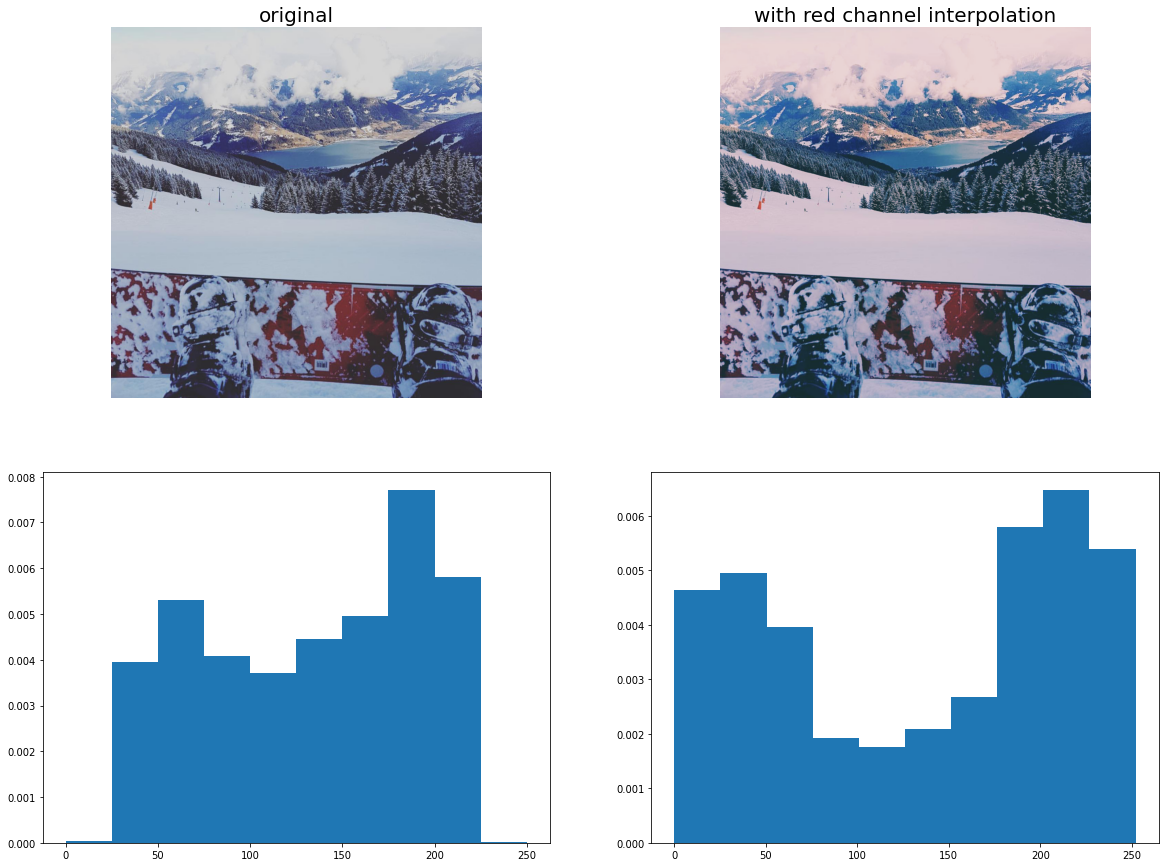

In [86]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
im = Image.open('./images/zell_am_see_snowboarding.jpg') # pixel values in [0,255]
r, g, b = im.split()
red_levels = [0., 12.75, 25.5, 51., 76.5, 127.5, 178.5, 204., 229.5, 242.25, 255.]
r1 = Image.fromarray((np.reshape(np.interp(np.array(r).ravel(), np.linspace(0,255,len(red_levels)), red_levels), (im.height, im.width))).astype(np.uint8), mode='L')
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.axis('off')
plt.subplot(222)
im1 = Image.merge('RGB', (r1, g, b))
plt.imshow(im1)
plt.axis('off')
plt.title('with red channel interpolation', size=20)
plt.subplot(223)
plt.hist(np.array(r).ravel(), density=True, stacked =True)
plt.subplot(224)
plt.hist(np.array(r1).ravel(), density=True, stacked =True)
plt.show()

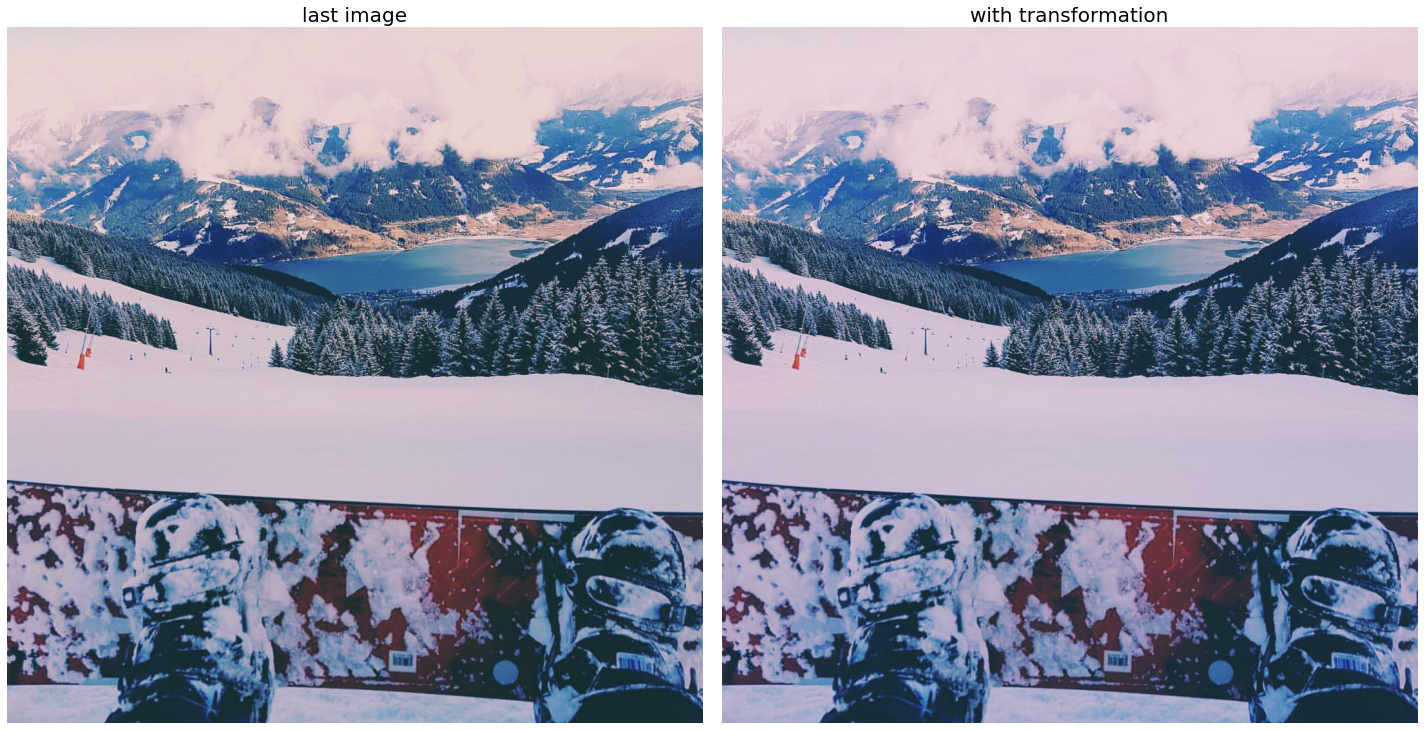

In [87]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im1)
plt.title('last image', size=20)
plt.axis('off')
b1 = Image.fromarray(np.clip(np.array(b) + 7.65, 0, 255).astype(np.uint8))
im1 = Image.merge('RGB', (r1, g, b1))
plt.subplot(122)
plt.imshow(im1)
plt.axis('off')
plt.title('with transformation', size=20)
plt.tight_layout()
plt.show()

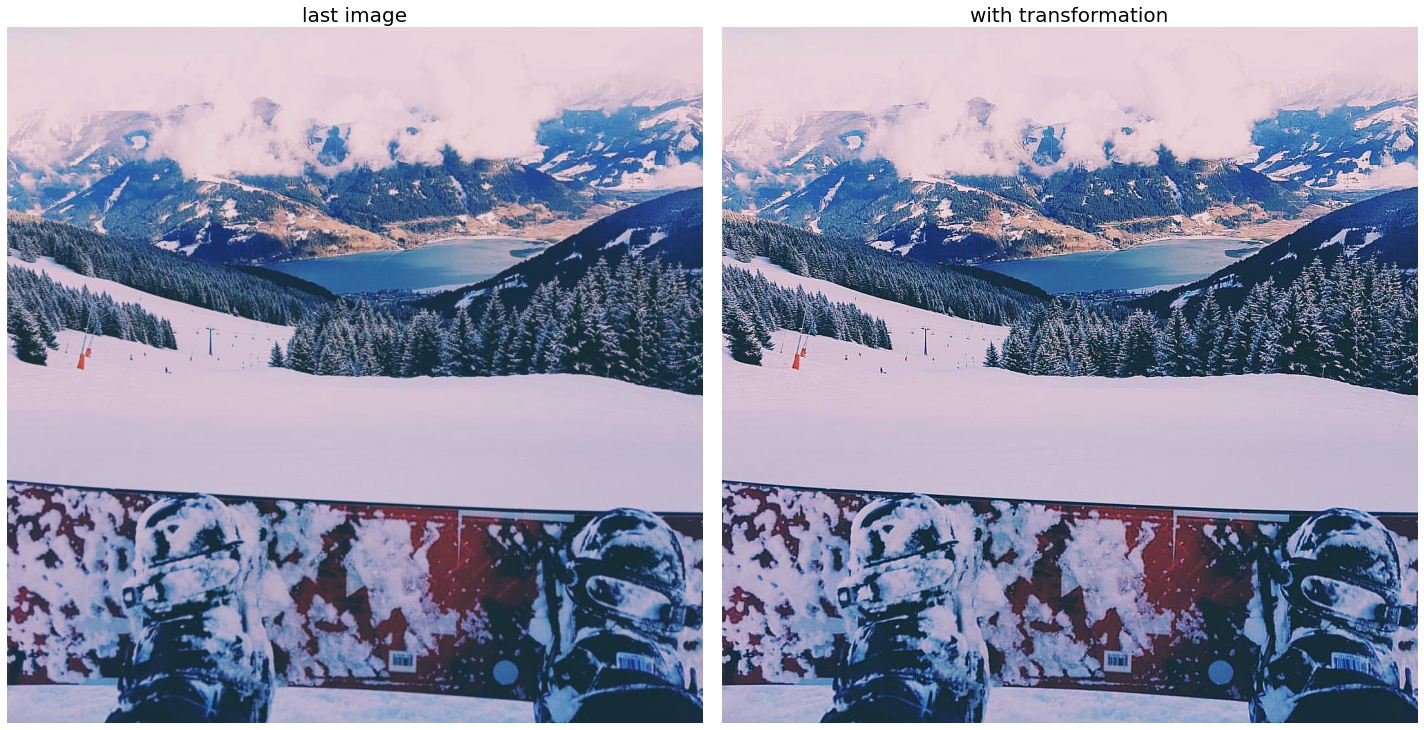

In [88]:
from PIL.ImageEnhance import Sharpness
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im1)
plt.title('last image', size=20)
plt.axis('off')
im2 = Sharpness(im1).enhance(3.0)
plt.subplot(122)
plt.imshow(im2)
plt.axis('off')
plt.title('with transformation', size=20)
plt.tight_layout()
plt.show()

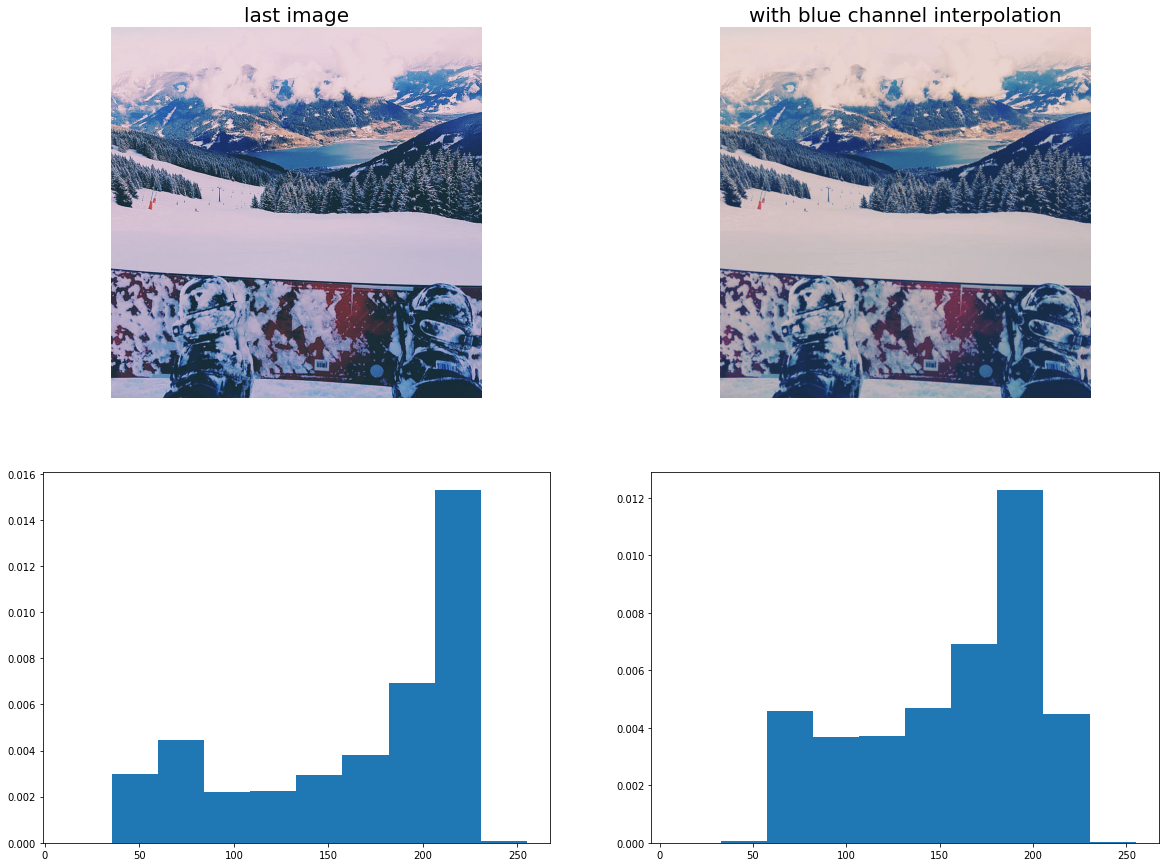

In [90]:
blue_levels = [0., 11.985, 30.09, 64.005, 81.09, 99.96, 107.1, 111.945, 121.125, 143.055, 147.9, 159.885, 171.105, 186.915, 215.985, 235.875, 255.]
b2 = Image.fromarray((np.reshape(np.interp(np.array(b1).ravel(), np.linspace(0,255,len(blue_levels)), blue_levels), (im.height, im.width))).astype(np.uint8), mode='L')
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(im2)
plt.title('last image', size=20)
plt.axis('off')
plt.subplot(222)
im3 = Image.merge('RGB', (r1, g, b2))
plt.imshow(im3)
plt.axis('off')
plt.title('with blue channel interpolation', size=20)
plt.subplot(223)
plt.hist(np.array(b1).ravel(), density=True, stacked =True)
plt.subplot(224)
plt.hist(np.array(b2).ravel(), density=True, stacked =True)
plt.show()

#  no 4

<function matplotlib.pyplot.show(close=None, block=None)>

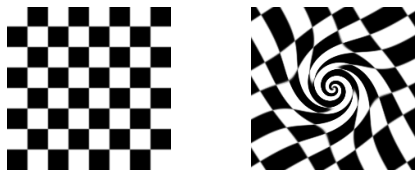

In [30]:
def shift_left(xy):
    xy[:,0] += 50
    return xy
image = data.checkerboard()
swirled = swirl(image, rotation=10, strength=10, radius=120)
warp(image, shift_left)
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(8,3),
                              sharex=True,sharey=True)
ax0.imshow(image,cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled,cmap=plt.cm.gray)
ax1.axis('off')
plt.show

# no 5

<function matplotlib.pyplot.show(close=None, block=None)>

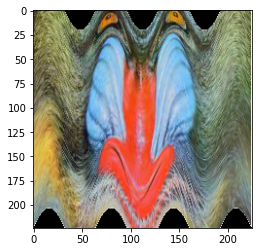

In [31]:
def wave(xy):
    xy[:,1]+= 20*np.sin(2*np.pi*xy[:,0]/64)
    return xy

im = imread('./images/mandrill.jpg')
im = warp(im,wave)
plt.imshow(im)
plt.show

# no 6

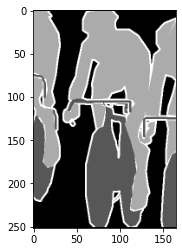

In [32]:
img = Image.open('./images/cycling.png').convert('RGB').convert('L')
img.show()
arr = np.array(img)
plt.imshow(arr, cmap='gray')

# no7


ValueError: shape mismatch: objects cannot be broadcast to a single shape

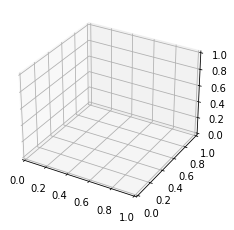

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1,2,1, projection='3d')
#def plot_3d(X,Y,Z, title, cmap):
im = imread('./images/parrot.jpg')
Y = np.arange(im.shape[0])
X = np.arange(im.shape[1])
Z1 = im[...,0]
Z2 = im[...,1]
Z3 = im[...,2]
ax.plot_surface(X,Y,Z1, cmap='Reds',title='3D plot for the red Channel')
#ax.plot_surface(X,Y,Z2, cmap='Greens',title='3D plot for the Green channel')
#ax.plot_surface(X,Y,Z3, cmap='Blues',title='3D plot for the Blue channel')
plt.show()

/tmp/ipykernel_5087/750867427.py:7: MatplotlibDeprecationWarning: Additional positional arguments to plot_surface() are deprecated since 3.4 and support for them will be removed two minor releases later.
  ax.plot_surface(X,Y,Z,cmap)


TypeError: len() of unsized object

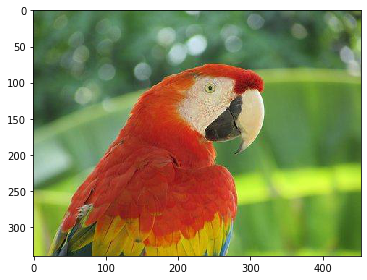

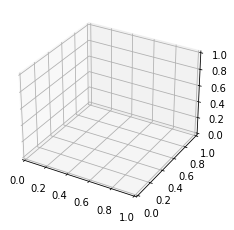

In [81]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(X, Y, Z, cmap):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    # implement this function to plot the channel pixel values in 3D
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,cmap)
   # fig.colorbar(plot_3d, shrink=0.5, aspect=5)
    plt.show()
 
im = imread('./images/parrot.jpg')
imshow(im)
Y = np.arange(im.shape[0])
X = np.arange(im.shape[1])
X, Y = np.meshgrid(X,Y)
Z1 = im[...,0]
Z2 = im[...,1]
Z3 = im[...,2]
plot_3d(X, Y, Z1, cmap='Reds')
plot_3d(X, Y, Z2, cmap='Greens')
plot_3d(X, Y, Z3, cmap='Blues')

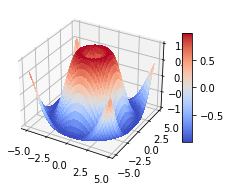

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)